In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import MinMaxScaler
import ast
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import seaborn as sns


In [ ]:
df = pd.read_excel("//content/City_Temperatures_Missing_Cities (2).xlsx")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3461 entries, 0 to 3460
Data columns (total 7 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Unnamed: 0                       3461 non-null   int64  
 1   Date                             3461 non-null   object 
 2   City                             3461 non-null   object 
 3   Latitude                         3461 non-null   object 
 4   Longitude                        3461 non-null   object 
 5   Measured Temperatures (Celsius)  3461 non-null   object 
 6   Rainfall (cm)                    923 non-null    float64
dtypes: float64(1), int64(1), object(5)
memory usage: 189.4+ KB


After loading the dataframe I noticed that Rainfall(cm) has 923 items while the rest has 3461, this means that 2538 items are missing

In [ ]:
df.head(10)

,Unnamed: 0,Date,City,Latitude,Longitude,Measured Temperatures (Celsius),Rainfall (cm)
0,0,2000-Jan-3,Frankfurt,50.1N,8.9E,"{'00:00': 13.282, '01:00': 15.36, '02:00': 15....",NaN
1,1,2000-Jan-5,Hong Kong,22.3N,114.2E,"{'00:00': 48.96, '01:00': 48.247, '02:00': 48....",NaN
2,2,2000-Jan-7,Sydney,33.9S,151.2E,"{'00:00': 4.548, '01:00': 4.236, '02:00': 3.58...",NaN
3,3,2000-Jan-8,Nairobi,00:00,00:00,"{'00:00': 13.402, '01:00': 13.05, '02:00': 14....",NaN
4,4,2000-Jan-10,Nairobi,1.3S,36.8E,"{'00:00': 15.784, '01:00': 12.595, '02:00': 14...",NaN
5,5,2000-Jan-11,Sydney,33.9S,151.2E,"{'00:00': 9.509, '01:00': 6.853, '02:00': 7.45...",NaN
6,6,2000-Jan-12,Ottawa,45.4N,75.7W,"{'00:00': 40.328, '01:00': 37.919, '02:00': 37...",0.89
7,7,2000-Jan-13,Sydney,33.9S,151.2E,"{'00:00': 8.891, '01:00': 4.674, '02:00': 4.36...",NaN
8,8,2000-Jan-14,Seattle,47.6N,112.3W,"{'00:00': 26.485, '01:00': 25.983, '02:00': 25...",NaN
9,9,2000-Jan-15,Frankfurt,50.1N,8.9E,"{'00:00': 11.316, '01:00': 10.25, '02:00': 12....",NaN


Pre-process the data. Take reasonable steps to clean and pre-process the
dataset.

In [ ]:
#renamed columns for ease
df.rename(columns={
    "Unnamed: 0": "Index",
    "Measured Temperatures (Celsius)": "Measured_Temperature",
    "Rainfall (cm)": "Rainfall_cm"
}, inplace=True)

In [ ]:
print(df['Measured_Temperature'])

0       {'00:00': 13.282, '01:00': 15.36, '02:00': 15....
1       {'00:00': 48.96, '01:00': 48.247, '02:00': 48....
2       {'00:00': 4.548, '01:00': 4.236, '02:00': 3.58...
3       {'00:00': 13.402, '01:00': 13.05, '02:00': 14....
4       {'00:00': 15.784, '01:00': 12.595, '02:00': 14...
                              ...                        
3456    {'00:00': 42.922, '01:00': 40.064, '02:00': 38...
3457    {'00:00': 35.242, '01:00': 33.796, '02:00': 33...
3458    {'00:00': 9.898, '01:00': 9.104, '02:00': 8.22...
3459    {'00:00': 15.249, '01:00': 13.489, '02:00': 11...
3460    {'00:00': 43.274, '01:00': 42.013, '02:00': 39...
Name: Measured_Temperature, Length: 3461, dtype: object


In [ ]:
df.head(10)

,Index,Date,City,Latitude,Longitude,Measured_Temperature,Rainfall_cm
0,0,2000-Jan-3,Frankfurt,50.1N,8.9E,"{'00:00': 13.282, '01:00': 15.36, '02:00': 15....",NaN
1,1,2000-Jan-5,Hong Kong,22.3N,114.2E,"{'00:00': 48.96, '01:00': 48.247, '02:00': 48....",NaN
2,2,2000-Jan-7,Sydney,33.9S,151.2E,"{'00:00': 4.548, '01:00': 4.236, '02:00': 3.58...",NaN
3,3,2000-Jan-8,Nairobi,00:00,00:00,"{'00:00': 13.402, '01:00': 13.05, '02:00': 14....",NaN
4,4,2000-Jan-10,Nairobi,1.3S,36.8E,"{'00:00': 15.784, '01:00': 12.595, '02:00': 14...",NaN
5,5,2000-Jan-11,Sydney,33.9S,151.2E,"{'00:00': 9.509, '01:00': 6.853, '02:00': 7.45...",NaN
6,6,2000-Jan-12,Ottawa,45.4N,75.7W,"{'00:00': 40.328, '01:00': 37.919, '02:00': 37...",0.89
7,7,2000-Jan-13,Sydney,33.9S,151.2E,"{'00:00': 8.891, '01:00': 4.674, '02:00': 4.36...",NaN
8,8,2000-Jan-14,Seattle,47.6N,112.3W,"{'00:00': 26.485, '01:00': 25.983, '02:00': 25...",NaN
9,9,2000-Jan-15,Frankfurt,50.1N,8.9E,"{'00:00': 11.316, '01:00': 10.25, '02:00': 12....",NaN


In [ ]:
#convert the date types
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3461 entries, 0 to 3460
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Index                 3461 non-null   int64         
 1   Date                  3427 non-null   datetime64[ns]
 2   City                  3461 non-null   object        
 3   Latitude              3461 non-null   object        
 4   Longitude             3461 non-null   object        
 5   Measured_Temperature  3461 non-null   object        
 6   Rainfall_cm           923 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(4)
memory usage: 189.4+ KB


In [ ]:
df.head(10)

,Index,Date,City,Latitude,Longitude,Measured_Temperature,Rainfall_cm
0,0,2000-01-03,Frankfurt,50.1N,8.9E,"{'00:00': 13.282, '01:00': 15.36, '02:00': 15....",NaN
1,1,2000-01-05,Hong Kong,22.3N,114.2E,"{'00:00': 48.96, '01:00': 48.247, '02:00': 48....",NaN
2,2,2000-01-07,Sydney,33.9S,151.2E,"{'00:00': 4.548, '01:00': 4.236, '02:00': 3.58...",NaN
3,3,2000-01-08,Nairobi,00:00,00:00,"{'00:00': 13.402, '01:00': 13.05, '02:00': 14....",NaN
4,4,2000-01-10,Nairobi,1.3S,36.8E,"{'00:00': 15.784, '01:00': 12.595, '02:00': 14...",NaN
5,5,2000-01-11,Sydney,33.9S,151.2E,"{'00:00': 9.509, '01:00': 6.853, '02:00': 7.45...",NaN
6,6,2000-01-12,Ottawa,45.4N,75.7W,"{'00:00': 40.328, '01:00': 37.919, '02:00': 37...",0.89
7,7,2000-01-13,Sydney,33.9S,151.2E,"{'00:00': 8.891, '01:00': 4.674, '02:00': 4.36...",NaN
8,8,2000-01-14,Seattle,47.6N,112.3W,"{'00:00': 26.485, '01:00': 25.983, '02:00': 25...",NaN
9,9,2000-01-15,Frankfurt,50.1N,8.9E,"{'00:00': 11.316, '01:00': 10.25, '02:00': 12....",NaN


In [ ]:
# #since so many values are missing it will be ideal to fill in the missing
df['Rainfall_cm'].fillna(df['Rainfall_cm'].mean(), inplace=True)
# #replace any missing values
df.dropna(subset=['Date', 'Latitude', 'Longitude', 'Measured_Temperature'], inplace=True)


<ipython-input-202-b166351e7b27>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Rainfall_cm'].fillna(df['Rainfall_cm'].mean(), inplace=True)


In [ ]:
df.head(10)

,Index,Date,City,Latitude,Longitude,Measured_Temperature,Rainfall_cm
0,0,2000-01-03,Frankfurt,50.1N,8.9E,"{'00:00': 13.282, '01:00': 15.36, '02:00': 15....",1.251907
1,1,2000-01-05,Hong Kong,22.3N,114.2E,"{'00:00': 48.96, '01:00': 48.247, '02:00': 48....",1.251907
2,2,2000-01-07,Sydney,33.9S,151.2E,"{'00:00': 4.548, '01:00': 4.236, '02:00': 3.58...",1.251907
3,3,2000-01-08,Nairobi,00:00,00:00,"{'00:00': 13.402, '01:00': 13.05, '02:00': 14....",1.251907
4,4,2000-01-10,Nairobi,1.3S,36.8E,"{'00:00': 15.784, '01:00': 12.595, '02:00': 14...",1.251907
5,5,2000-01-11,Sydney,33.9S,151.2E,"{'00:00': 9.509, '01:00': 6.853, '02:00': 7.45...",1.251907
6,6,2000-01-12,Ottawa,45.4N,75.7W,"{'00:00': 40.328, '01:00': 37.919, '02:00': 37...",0.890000
7,7,2000-01-13,Sydney,33.9S,151.2E,"{'00:00': 8.891, '01:00': 4.674, '02:00': 4.36...",1.251907
8,8,2000-01-14,Seattle,47.6N,112.3W,"{'00:00': 26.485, '01:00': 25.983, '02:00': 25...",1.251907
9,9,2000-01-15,Frankfurt,50.1N,8.9E,"{'00:00': 11.316, '01:00': 10.25, '02:00': 12....",1.251907


In [ ]:
#drop the index column
if 'Index' in df.columns:
    df.drop(columns=['Index'], inplace=True)

In [ ]:
df.head(10)

,Date,City,Latitude,Longitude,Measured_Temperature,Rainfall_cm
0,2000-01-03,Frankfurt,50.1N,8.9E,"{'00:00': 13.282, '01:00': 15.36, '02:00': 15....",1.251907
1,2000-01-05,Hong Kong,22.3N,114.2E,"{'00:00': 48.96, '01:00': 48.247, '02:00': 48....",1.251907
2,2000-01-07,Sydney,33.9S,151.2E,"{'00:00': 4.548, '01:00': 4.236, '02:00': 3.58...",1.251907
3,2000-01-08,Nairobi,00:00,00:00,"{'00:00': 13.402, '01:00': 13.05, '02:00': 14....",1.251907
4,2000-01-10,Nairobi,1.3S,36.8E,"{'00:00': 15.784, '01:00': 12.595, '02:00': 14...",1.251907
5,2000-01-11,Sydney,33.9S,151.2E,"{'00:00': 9.509, '01:00': 6.853, '02:00': 7.45...",1.251907
6,2000-01-12,Ottawa,45.4N,75.7W,"{'00:00': 40.328, '01:00': 37.919, '02:00': 37...",0.890000
7,2000-01-13,Sydney,33.9S,151.2E,"{'00:00': 8.891, '01:00': 4.674, '02:00': 4.36...",1.251907
8,2000-01-14,Seattle,47.6N,112.3W,"{'00:00': 26.485, '01:00': 25.983, '02:00': 25...",1.251907
9,2000-01-15,Frankfurt,50.1N,8.9E,"{'00:00': 11.316, '01:00': 10.25, '02:00': 12....",1.251907


In [ ]:
# convert Latitude and Longitude to numerical values

def convert_to_numeric(value):
    try:
        return float(value[:-1]) * (-1 if value[-1] in ('S', 'W', 'E', 'N') else 1)
    except (TypeError, ValueError):
       # Handle cases where value is already numeric or invalid
        return np.nan

df['Latitude'] = df['Latitude'].apply(convert_to_numeric)
df['Longitude'] = df['Longitude'].apply(convert_to_numeric)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3427 entries, 0 to 3460
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Date                  3427 non-null   datetime64[ns]
 1   City                  3427 non-null   object        
 2   Latitude              2994 non-null   float64       
 3   Longitude             2994 non-null   float64       
 4   Measured_Temperature  3427 non-null   object        
 5   Rainfall_cm           3427 non-null   float64       
dtypes: datetime64[ns](1), float64(3), object(2)
memory usage: 187.4+ KB


In [ ]:
df.head(10)

,Date,City,Latitude,Longitude,Measured_Temperature,Rainfall_cm
0,2000-01-03,Frankfurt,-50.1,-8.9,"{'00:00': 13.282, '01:00': 15.36, '02:00': 15....",1.251907
1,2000-01-05,Hong Kong,-22.3,-114.2,"{'00:00': 48.96, '01:00': 48.247, '02:00': 48....",1.251907
2,2000-01-07,Sydney,-33.9,-151.2,"{'00:00': 4.548, '01:00': 4.236, '02:00': 3.58...",1.251907
3,2000-01-08,Nairobi,NaN,NaN,"{'00:00': 13.402, '01:00': 13.05, '02:00': 14....",1.251907
4,2000-01-10,Nairobi,-1.3,-36.8,"{'00:00': 15.784, '01:00': 12.595, '02:00': 14...",1.251907
5,2000-01-11,Sydney,-33.9,-151.2,"{'00:00': 9.509, '01:00': 6.853, '02:00': 7.45...",1.251907
6,2000-01-12,Ottawa,-45.4,-75.7,"{'00:00': 40.328, '01:00': 37.919, '02:00': 37...",0.890000
7,2000-01-13,Sydney,-33.9,-151.2,"{'00:00': 8.891, '01:00': 4.674, '02:00': 4.36...",1.251907
8,2000-01-14,Seattle,-47.6,-112.3,"{'00:00': 26.485, '01:00': 25.983, '02:00': 25...",1.251907
9,2000-01-15,Frankfurt,-50.1,-8.9,"{'00:00': 11.316, '01:00': 10.25, '02:00': 12....",1.251907


In [ ]:
# # Convert 'Measured_Temperature' to numeric
def extract_avg_temperature(temp_str):
    #Extracts average temperature
    try:
        temp_dict = ast.literal_eval(temp_str)

        return sum(temp_dict.values()) / len(temp_dict)
    except (TypeError, ValueError, SyntaxError, NameError):  # Add NameError
        # Handle cases where value is already numeric or invalid
        # Return np.nan if conversion or calculation fails or if 'nan' is encountered.
        return np.nan  # This is the fix

df['Measured_Temperature'] = df['Measured_Temperature'].apply(extract_avg_temperature)

# Remove rows with NaN values after conversion to prevent further errors
df.dropna(subset=['Latitude', 'Longitude', 'Measured_Temperature', 'Rainfall_cm'], inplace=True)



In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2966 entries, 0 to 3057
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Date                  2966 non-null   datetime64[ns]
 1   City                  2966 non-null   object        
 2   Latitude              2966 non-null   float64       
 3   Longitude             2966 non-null   float64       
 4   Measured_Temperature  2966 non-null   float64       
 5   Rainfall_cm           2966 non-null   float64       
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 162.2+ KB


In [ ]:
df.head(10)

,Date,City,Latitude,Longitude,Measured_Temperature,Rainfall_cm
0,2000-01-03,Frankfurt,-50.1,-8.9,15.931458,1.251907
1,2000-01-05,Hong Kong,-22.3,-114.2,50.838000,1.251907
2,2000-01-07,Sydney,-33.9,-151.2,7.061750,1.251907
4,2000-01-10,Nairobi,-1.3,-36.8,15.637542,1.251907
5,2000-01-11,Sydney,-33.9,-151.2,8.598500,1.251907
6,2000-01-12,Ottawa,-45.4,-75.7,41.551625,0.890000
7,2000-01-13,Sydney,-33.9,-151.2,8.070625,1.251907
8,2000-01-14,Seattle,-47.6,-112.3,26.861917,1.251907
9,2000-01-15,Frankfurt,-50.1,-8.9,12.510875,1.251907
10,2000-01-17,Frankfurt,-50.1,-8.9,13.814208,1.251907


In [ ]:
# Normalize numerical data
scaler = MinMaxScaler()
df[['Latitude', 'Longitude', 'Measured_Temperature', 'Rainfall_cm']] = scaler.fit_transform(
    df[['Latitude', 'Longitude', 'Measured_Temperature', 'Rainfall_cm']]
)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2966 entries, 0 to 3057
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Date                  2966 non-null   datetime64[ns]
 1   City                  2966 non-null   object        
 2   Latitude              2966 non-null   float64       
 3   Longitude             2966 non-null   float64       
 4   Measured_Temperature  2966 non-null   float64       
 5   Rainfall_cm           2966 non-null   float64       
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 162.2+ KB


Split the dataset. The first twenty years of this dataset are correctly labeled with
city names. The last 3-4 years are not. Split the dataset into one set with known
cities and one without

Split the dataset. The first twenty years of this dataset are correctly labeled with
city names. The last 3-4 years are not. Split the dataset into one set with known
cities and one without.

In [ ]:
# Define the split point
split_date = pd.Timestamp('2021-09-01')

# Split the dataset
known_cities = df[df['Date'] < split_date]  # Before September 2021
unknown_cities = df[df['Date'] >= split_date]  # From September 2021 onward

# Print the number of rows in each set
print("Known cities dataset:", known_cities.shape[0], "rows")
print("Unknown cities dataset:", unknown_cities.shape[0], "rows")


Known cities dataset: 2956 rows
Unknown cities dataset: 10 rows


Preprocess city names

In [ ]:
# Standardize city names before training
known_cities['City'] = known_cities['City'].str.upper().str.strip()
unknown_cities['City'] = unknown_cities['City'].str.upper().str.strip()

<ipython-input-215-53ca63b8ce4e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  known_cities['City'] = known_cities['City'].str.upper().str.strip()
<ipython-input-215-53ca63b8ce4e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unknown_cities['City'] = unknown_cities['City'].str.upper().str.strip()


Model Training:
You can select any appropriate classifier for this task. For example, K-Nearest
Neighbors, a Decision Tree, a Support Vector Machine, or a Multi-Layered perceptron, all
of which are supported in Sci-Kit Learn. You should train your model on the several
years of data that are correctly labeled with city names and then use your model to fill in
the missing city names. Notice that you have no test set (since the withheld rows don’t
have accurate labels) but if you want, you can reserve a “validation” set which is a
portion of your training data withheld to check your model's performance before filling in
the missing names.

In [ ]:
# encode the target variable, City
label_encoder = LabelEncoder()
known_cities['City_Label'] = label_encoder.fit_transform(known_cities['City'])

# features and target variable
features = ['Latitude', 'Longitude', 'Measured_Temperature', 'Rainfall_cm']
X = known_cities[features].fillna(0)  # Handle missing values if any
y = known_cities['City_Label']

# chose to condyct train test split of 80% training and 20%validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# the features in this dataset do not follow normally distribution so I chose to normalize the feature using MinMax Scalar
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)




<ipython-input-216-ced1bcbc82e6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  known_cities['City_Label'] = label_encoder.fit_transform(known_cities['City'])


In [ ]:
# List of classifiers to compare
classifiers = {
    'MLP': MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=300, random_state=42),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'SVM': SVC(random_state=42)
}

# Compare classifiers
for name, classifier in classifiers.items():
    # Train the classifier
    classifier.fit(X_train, y_train)

    # Predict on validation set
    y_pred = classifier.predict(X_val)

    # Print results
    print(f"\n{name} Classifier:")
    print("Validation Accuracy:", accuracy_score(y_val, y_pred))
    print("Classification Report:\n", classification_report(y_val, y_pred))



MLP Classifier:
Validation Accuracy: 0.9915540540540541
Classification Report:
               precision    recall  f1-score   support

           3       1.00      1.00      1.00        83
           4       0.00      0.00      0.00         1
           5       0.99      1.00      0.99        89
           7       0.00      0.00      0.00         1
           9       0.99      1.00      0.99        87
          12       1.00      1.00      1.00        91
          13       0.00      0.00      0.00         1
          15       0.99      1.00      0.99        80
          16       0.00      0.00      0.00         1
          19       0.99      1.00      0.99        71
          20       0.00      0.00      0.00         1
          21       0.99      1.00      0.99        86

    accuracy                           0.99       592
   macro avg       0.58      0.58      0.58       592
weighted avg       0.98      0.99      0.99       592


KNN Classifier:
Validation Accuracy: 0.991554054054

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/m

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2966 entries, 0 to 3057
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Date                  2966 non-null   datetime64[ns]
 1   City                  2966 non-null   object        
 2   Latitude              2966 non-null   float64       
 3   Longitude             2966 non-null   float64       
 4   Measured_Temperature  2966 non-null   float64       
 5   Rainfall_cm           2966 non-null   float64       
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 162.2+ KB


In [ ]:
# Train the MLP Classifier
mlp = MLPClassifier(
    # Two hidden layers with 100 and 50 neurons
    hidden_layer_sizes=(100, 50),
    # Activation function
    activation='relu',
     # Optimizer
    solver='adam',
    # Maximum epochs
    max_iter=300,
    random_state=42
)

mlp.fit(X_train, y_train)

# Evaluate the model
y_pred = mlp.predict(X_val)
print("Validation Accuracy:", accuracy_score(y_val, y_pred))
print("\nClassification Report:\n", classification_report(y_val, y_pred))

# Predict for unlabeled data
unknown_cities_features = unknown_cities[features].fillna(0)
unknown_cities_features = scaler.transform(unknown_cities_features)

# Predict the city labels for the unknown cities
predicted_labels = mlp.predict(unknown_cities_features)

#Convert predicted labels back to city names
unknown_cities.loc[:, 'Predicted_City'] = label_encoder.inverse_transform(predicted_labels)


print("Cities in known dataset (training):")
print(known_cities['City'].unique())

print("\nCities in unknown dataset (prediction):")
print(unknown_cities['City'].unique())

print("\nTotal number of unique cities:")
print(len(set(known_cities['City'].unique()).union(set(unknown_cities['City'].unique()))))


Validation Accuracy: 0.9915540540540541

Classification Report:
               precision    recall  f1-score   support

           3       1.00      1.00      1.00        83
           4       0.00      0.00      0.00         1
           5       0.99      1.00      0.99        89
           7       0.00      0.00      0.00         1
           9       0.99      1.00      0.99        87
          12       1.00      1.00      1.00        91
          13       0.00      0.00      0.00         1
          15       0.99      1.00      0.99        80
          16       0.00      0.00      0.00         1
          19       0.99      1.00      0.99        71
          20       0.00      0.00      0.00         1
          21       0.99      1.00      0.99        86

    accuracy                           0.99       592
   macro avg       0.58      0.58      0.58       592
weighted avg       0.98      0.99      0.99       592

Cities in known dataset (training):
['FRANKFURT' 'HONG KONG' 'SYDNEY

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
<ipython-input-219-0245e783cdd4>:29: SettingWithC

Visualization:
Each row of data contains 24 temperatures and 1 precipitation value. The daily
temperatures are stored along with the time that they were collected, one each hour.
You will need to use a dimensionality-reducing technique (like tSNE or PCA) to project
these 25 values into a 2D feature space. You may also want to consider the month that
the data were collected since temperatures have seasonal variations. You should
produce two scatter plots. One should show every row with a known city label as a point
and the other should include every row from the dataset as a point, both with known
cities and the rows that you have predicted city names for. Use the names of the cities
to color the points in your scatter plot. You should be able to judge the performance of
your classifier using these plots.

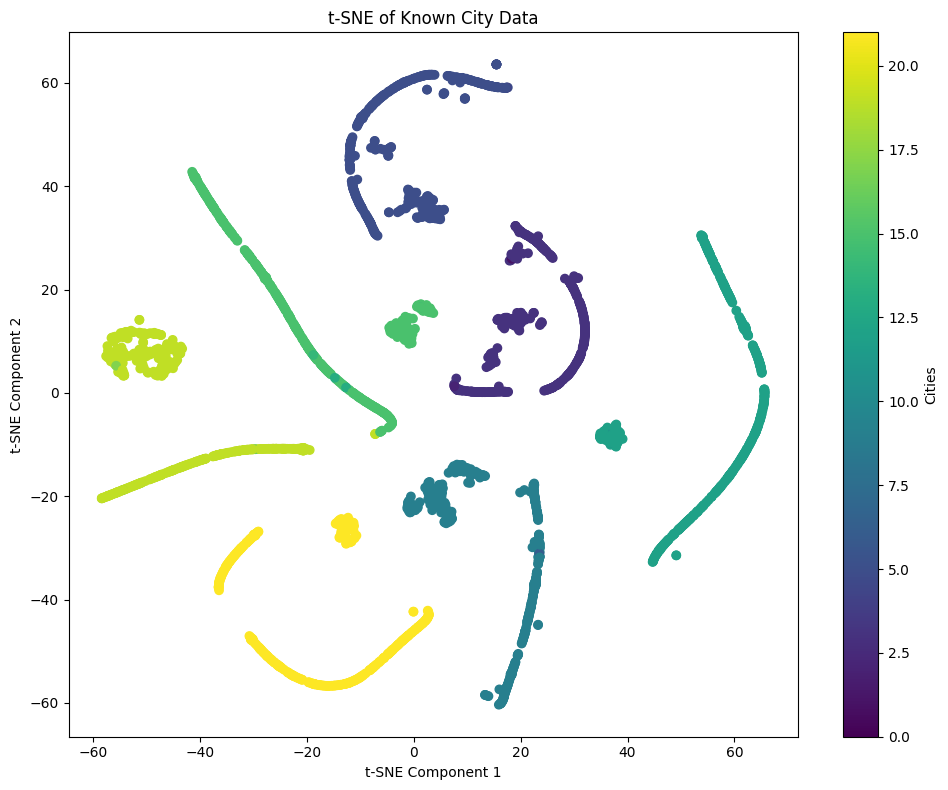

In [ ]:
# Prepare unknown cities for prediction
unknown_cities_features = unknown_cities[features].fillna(0)
unknown_cities_scaled = scaler.transform(unknown_cities_features)

# Predict the city labels for the unknown cities
predicted_labels = mlp.predict(unknown_cities_scaled)

# Convert predicted labels back to city names
unknown_cities.loc[:, 'Predicted_City'] = label_encoder.inverse_transform(predicted_labels)

# Prepare data for t-SNE
all_data = pd.concat([X, unknown_cities_features], axis=0).fillna(0)
all_data_scaled = scaler.transform(all_data)

# Dimensionality Reduction using t-SNE
tsne = TSNE(n_components=2, random_state=42)
all_data_tsne = tsne.fit_transform(all_data_scaled)

# Separate transformed data for known and unknown cities
X_tsne = all_data_tsne[:X.shape[0]]  # Transformed data for known cities
X_unknown_tsne = all_data_tsne[X.shape[0]:]  # Transformed data for unknown cities

# Visualize known cities
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='viridis')
plt.title('t-SNE of Known City Data')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.colorbar(scatter, label='Cities')
plt.tight_layout()
plt.show()


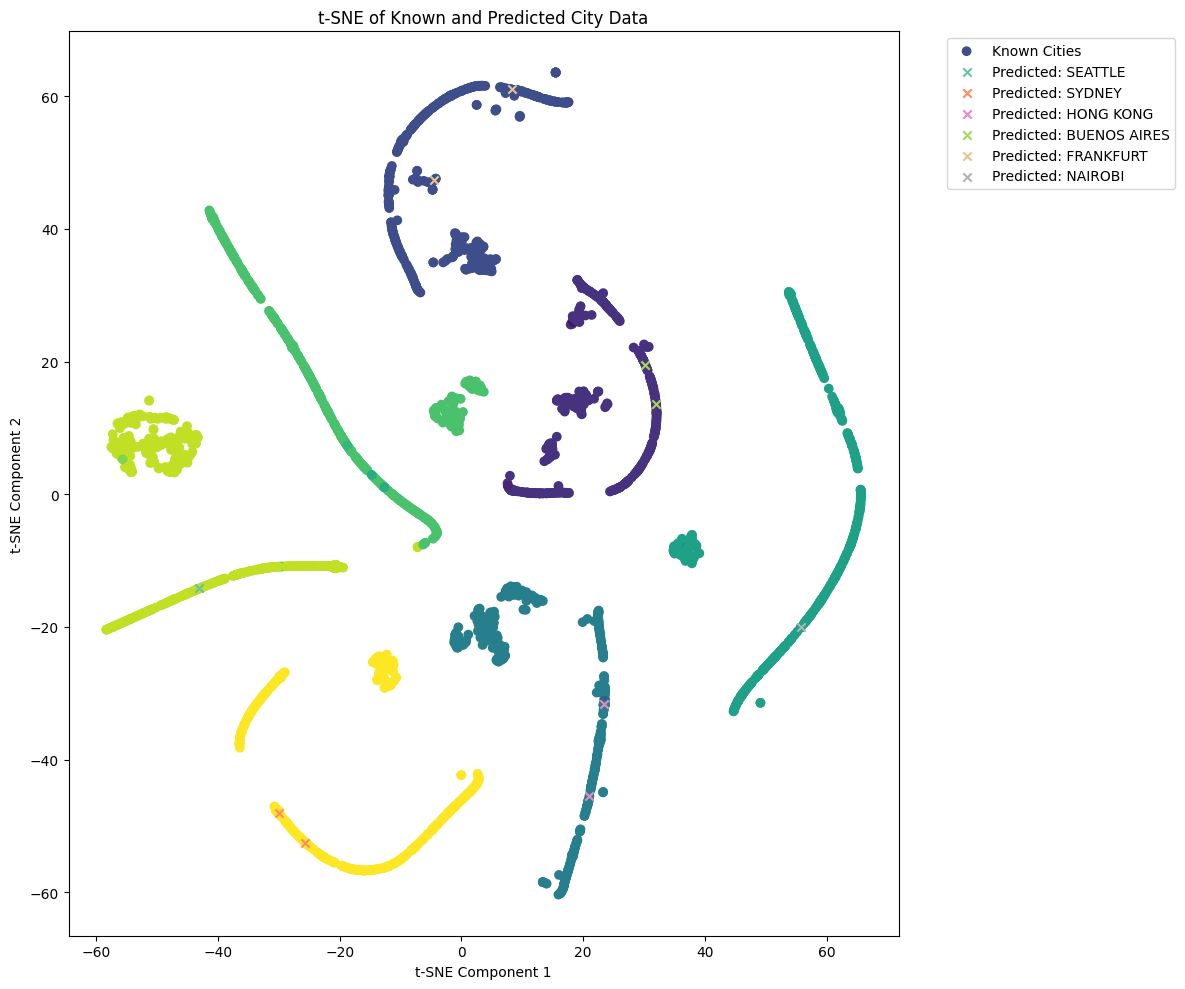

In [ ]:
# Visualize known and predicted cities
plt.figure(figsize=(12, 10))

# Plot known cities
known_scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='viridis', label='Known Cities')

# Create a color map for predicted cities
unique_predicted_cities = unknown_cities['Predicted_City'].unique()
color_palette = plt.cm.Set2(np.linspace(0, 1, len(unique_predicted_cities)))

# Plot each predicted city with a different color
for city, color in zip(unique_predicted_cities, color_palette):
    city_mask = unknown_cities['Predicted_City'] == city
    plt.scatter(
        X_unknown_tsne[city_mask, 0],
        X_unknown_tsne[city_mask, 1],
        c=[color],
        marker='x',
        label=f'Predicted: {city}'
    )

plt.title('t-SNE of Known and Predicted City Data')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()